In [1]:
#%pip install scikit-learn
#%pip install apafib


## Problemas de corazón

### Carga de datos
Cargaremos los datos desde la libreria de apafib.

In [2]:
import apafib
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.decomposition import PCA
#import plotly.express as px
from sklearn.naive_bayes import BernoulliNB, GaussianNB, CategoricalNB, MultinomialNB
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, RocCurveDisplay, accuracy_score, precision_score,recall_score, f1_score, PrecisionRecallDisplay, roc_auc_score, roc_curve
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from IPython.display import display, HTML
from mpl_toolkits.mplot3d import Axes3D

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import display, HTML
show_html = lambda html: display(HTML(html))

In [4]:
df = apafib.load_heart_failure()
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


## Explicacion de los datos
- **age**: edad del paciente (años)
- **anemia**: disminución de glóbulos rojos o hemoglobina (booleana)
- **high_blood_pressure**: si el paciente tiene hipertensión (booleano)
- **creatinine_phosphokinase (CPK)**: nivel de la enzima CPK en la sangre (mcg/L)
- **diabetes**: si el paciente tiene diabetes (booleano)
- **ejection_fraction**: porcentaje de sangre que sale del corazón en cada contracción (porcentaje)
- **platelets**: plaquetas en la sangre (kiloplaquetas/mL)
- **sex**: mujer u hombre (binario)
- **serum_creatinine**: nivel de creatinina sérica en la sangre (mg/dL)
- **serum_sodium**: nivel de sodio sérico en la sangre (mEq/L)
- **smoking**: si el paciente fuma o no (booleano)
- **time**: período de seguimiento (días)
- **DEATH_EVENT**: si el paciente falleció durante el período de seguimiento (booleano)

DEATH_EVENT es la variable objetivo de este problema ya que este se basa en la predicción de fallecimiento de un paciente según estos diferentes parametros.



## Division y visualización del cojunto



In [6]:
y = df["DEATH_EVENT"]
X = df.loc[:,df.columns != "DEATH_EVENT"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=0)


## Primera Visualizacion de los datos



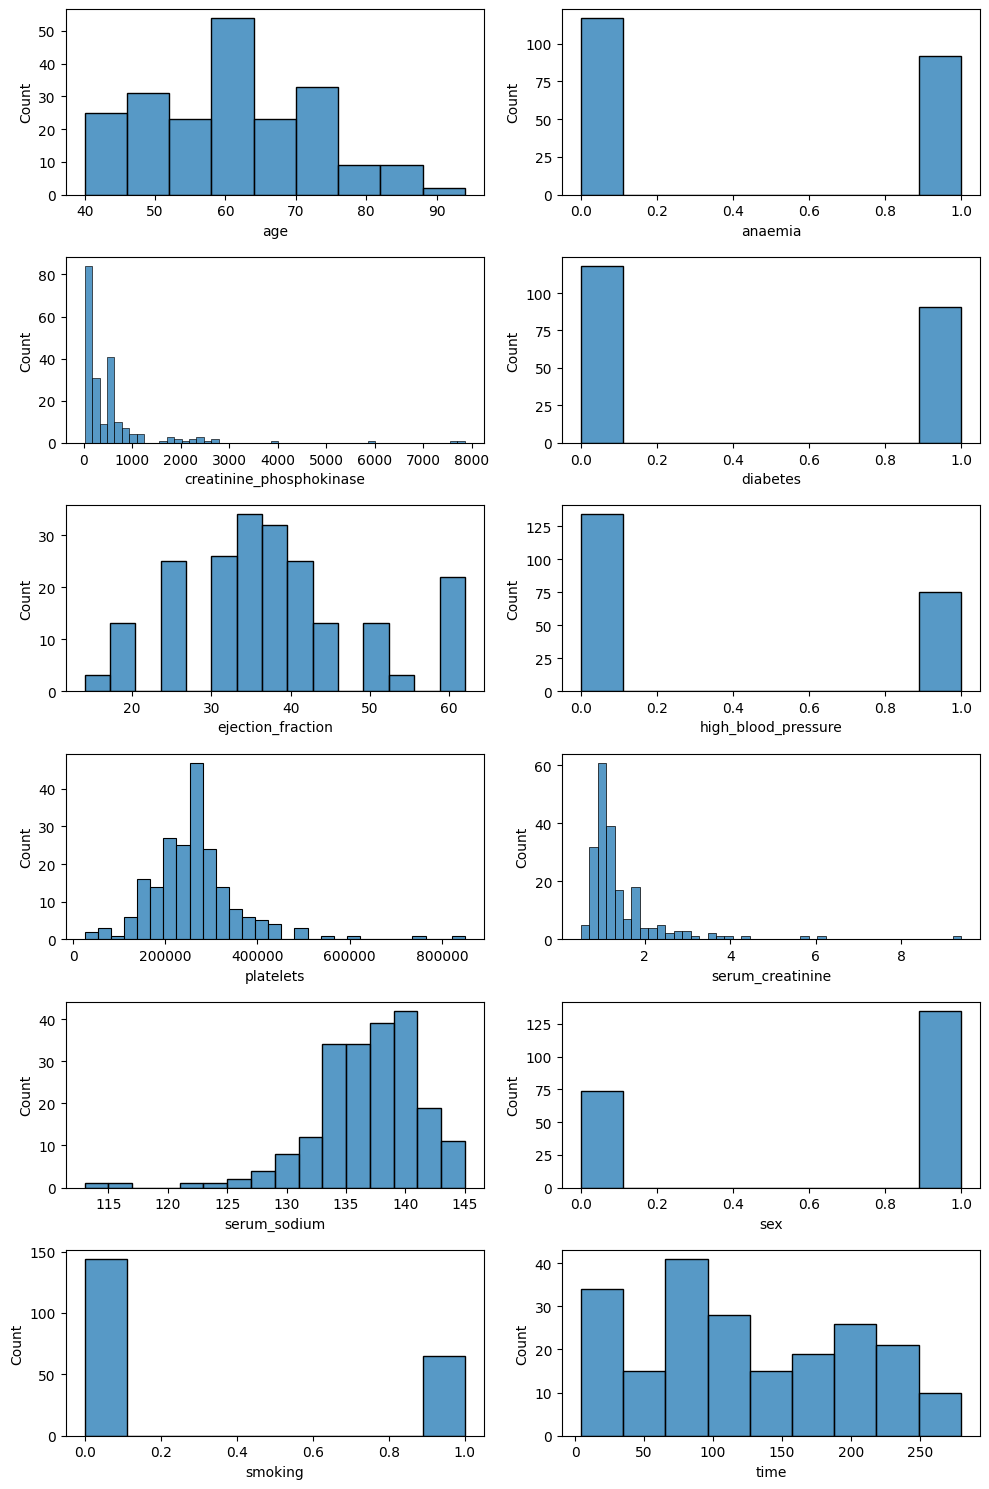

In [7]:
fig, axes = plt.subplots(6,2,figsize=(10,15))

X_train_frame = pd.DataFrame(X_train)
X_train_frame.columns=X.columns
for i, c in enumerate(X.columns):
    ax = axes.reshape(-1)[i]
    if X_train_frame[c].dtype.kind == 'O':
        a = sns.countplot(x=c,data=X_train_frame,ax=ax)
    else:
        b = sns.histplot(x=c,data=X_train_frame,ax=ax)
plt.tight_layout()

Como dice el enunciado, algunas de las variables continuas no parecen muy gausianas, por lo que haremos dos conjuntos de datos, uno que tenga las variables originales y otro en el que las variables que se desvíen bastante de la gausianidad están transformadas con la función logaritmo.

Como mas adelante explica el enunciado, a parte de las variables binarias como smoking, sex, etc... las variables continuas no son muy gausianas.

(<Figure size 1000x800 with 1 Axes>, <Axes: >)

<Axes: >

Text(0.5, 1.0, 'Matriz de Correlación')

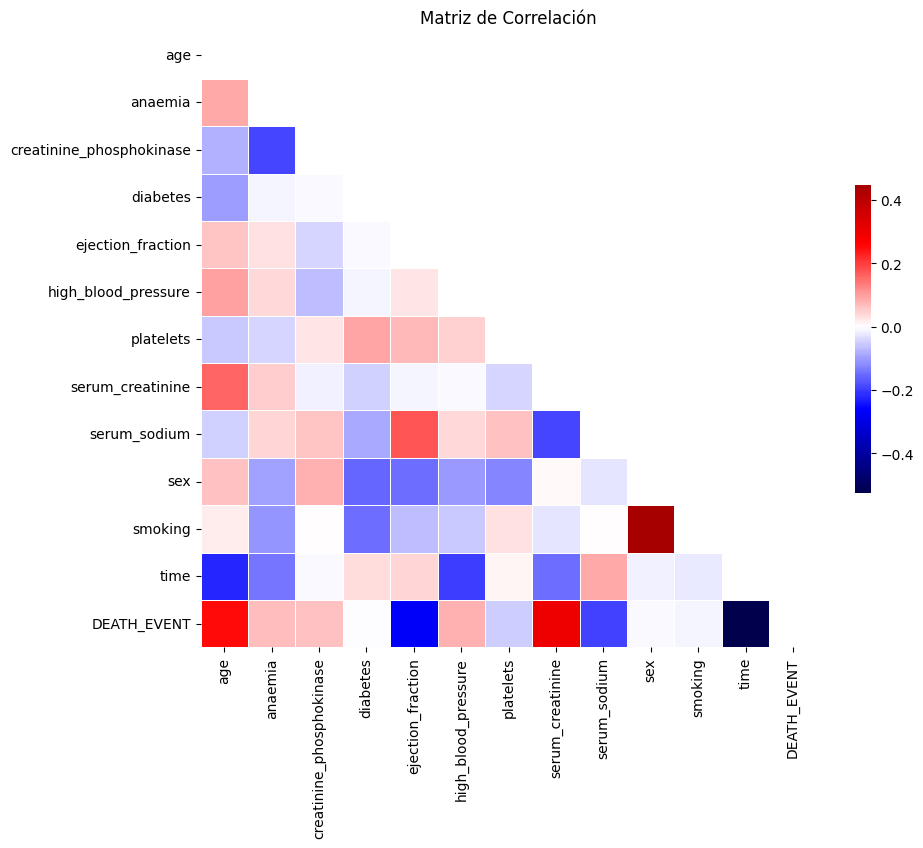

In [8]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
plt.subplots(figsize = (10,8))
sns.heatmap(corr, mask = mask,  cmap='seismic',  center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Matriz de Correlación")

plt.show()

O numericamente la correlación entre la variable objetivo y las demas variables

In [9]:
corr[12:].sort_values(by = "DEATH_EVENT", axis = 1, ascending=False)

,DEATH_EVENT,serum_creatinine,age,high_blood_pressure,anaemia,creatinine_phosphokinase,diabetes,sex,smoking,platelets,serum_sodium,ejection_fraction,time
DEATH_EVENT,1.0,0.294278,0.253729,0.079351,0.06627,0.062728,-0.001943,-0.004316,-0.012623,-0.049139,-0.195204,-0.268603,-0.526964


Como podemos ver en el grafico o en la tabla de correlación, tanto serum_creatinine y age tienen una fuerte correlación con DEAT_EVENT

Ahora vamos a hacer una PCA para entender la variancia de DEATH_EVENT segun las componentes

Text(0.5, 1.0, 'Porcentaje de variancia explicada por componente')

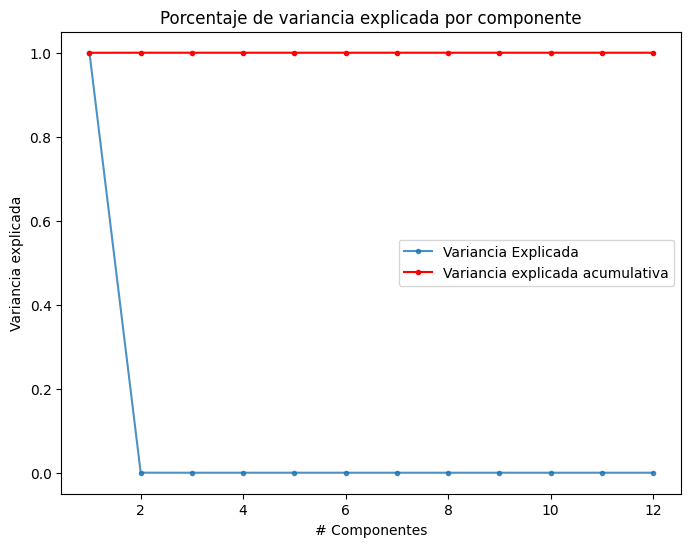

In [10]:
pca = PCA().fit(X_train)
fig = plt.figure(figsize=(8,6))
plt.plot(range(1,len(pca.explained_variance_ratio_ )+1),pca.explained_variance_ratio_ ,alpha=0.8,marker='.',label="Variancia Explicada")
y_label = plt.ylabel('Variancia explicada')
x_label = plt.xlabel('# Componentes')
plt.plot(range(1,len(pca.explained_variance_ratio_ )+1),
         np.cumsum(pca.explained_variance_ratio_),
         c='red',marker='.',
         label="Variancia explicada acumulativa")
plt.legend()
plt.title('Porcentaje de variancia explicada por componente')

Como podemos ver, los dos primeros componentes, como hemos dicho antes, son los que explican mas la varianza acumulada.

Text(0.5, 0, 'Primer Componente Principal')

Text(0.5, 0.5, 'Segundo Componente Principal')

Text(0.5, 0, 'Tercer Componente Principal')

Text(0.5, 0.92, 'Scatter Plot 3D de los tres primeros componentes principales')

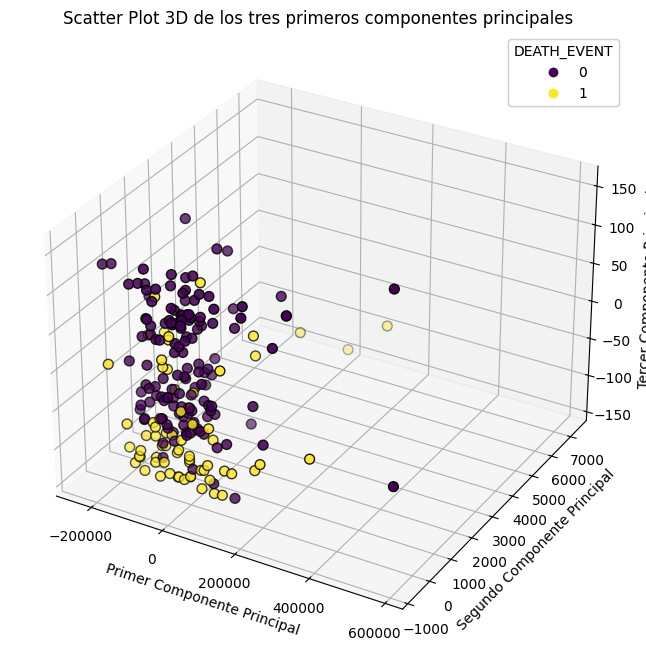

In [11]:
from mpl_toolkits.mplot3d import Axes3D
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_train)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y_train, cmap='viridis', edgecolor='k', s=50)

ax.set_xlabel('Primer Componente Principal')
ax.set_ylabel('Segundo Componente Principal')
ax.set_zlabel('Tercer Componente Principal')

ax.set_title('Scatter Plot 3D de los tres primeros componentes principales')

legend = ax.legend(*scatter.legend_elements(), title='DEATH_EVENT')
ax.add_artist(legend)


Podemos observar cumulos de datos que, más o menos, se separan por valores, de todas formas, hay muchas zonas donde no se acaban de separar los puntos.

Por lo tanto sí, es posible que exista una relación entre las variables del conjunto de datos y la variable objetivo. Estos cúmulos sugieren que las variables del conjunto de datos pueden influir en la variable objetivo de alguna manera.

Sin embargo, también es importante remarcar, como hemos dicho ya, que existen áreas en el gráfico donde los puntos no se separan claramente y hay cierta superposición entre las clases de la variable objetivo. Esto indica que la relación no es completamente lineal ni perfectamente discriminativa, lo que podría ser el resultado de que la relacion de las variables con la variable objetivo sea compleja o por lo contrario que no haya relacion.

Por lo tanto, aunque hay indicios de una relación entre las variables del conjunto de datos y la variable objetivo, no es en absoluto concluyente hasta que hagamos mas analisis.



## Naive Bayes con dos conjuntos

Como hemos dicho antes, haremos dos conjuntos de datos, uno que tenga las variables originales y otro en el que las variables que se desvíen bastante de la gausianidad están transformadas con la función logaritmo.

In [12]:
def save_results(clf, X_test, y_test, nclf, df):
    df.loc[nclf,'test acc'] = accuracy_score(y_test, clf.predict(X_test))
    df.loc[nclf,'precision score (W)'] = precision_score(y_test, clf.predict(X_test), average='weighted')
    df.loc[nclf,'recall score (W)'] = recall_score(y_test, clf.predict(X_test), average='weighted')
    df.loc[nclf,'f1 score (W)'] = f1_score(y_test, clf.predict(X_test), average='weighted')
    return df

results_df = pd.DataFrame()

### Primera prueba: Conjunto no normalizado

In [13]:
gnb = GaussianNB()
print(np.mean(cross_val_score(gnb,X_train,y_train, cv=10)))

0.799047619047619


In [14]:
gnb_model = GaussianNB().fit(X_train, y_train)

print('Priors:', gnb_model.class_prior_)
print('Means:\n')
means =pd.DataFrame(gnb_model.theta_)
means.columns=X.columns
means

Priors: [0.67464115 0.32535885]
Means:



,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,58.283688,0.411348,547.063830,0.425532,40.148936,0.340426,267215.051560,1.183688,137.156028,0.659574,0.319149,156.290780
1,65.303926,0.500000,689.852941,0.455882,32.029412,0.397059,259066.267794,1.794265,134.955882,0.617647,0.294118,67.044118


Para interpretar los resultados del modelo haremos una confusion matrix. Esta es una matriz 2x2 que representa estos valores sobre el modelo:

-**Cuadrante Superior Izquierdo (TN)**: Representa la cantidad de instancias que el modelo clasificó correctamente como negativas.

-**Cuadrante Superior Derecho (FP)**: Representa la cantidad de instancias que el modelo clasificó incorrectamente como positivas.

-**Cuadrante Inferior Izquierdo (FN)**: Representa la cantidad de instancias que el modelo clasificó incorrectamente como negativas.

-**Cuadrante Inferior Derecho (TP)**: Representa la cantidad de instancias que el modelo clasificó correctamente como positivas.

<Figure size 800x800 with 0 Axes>

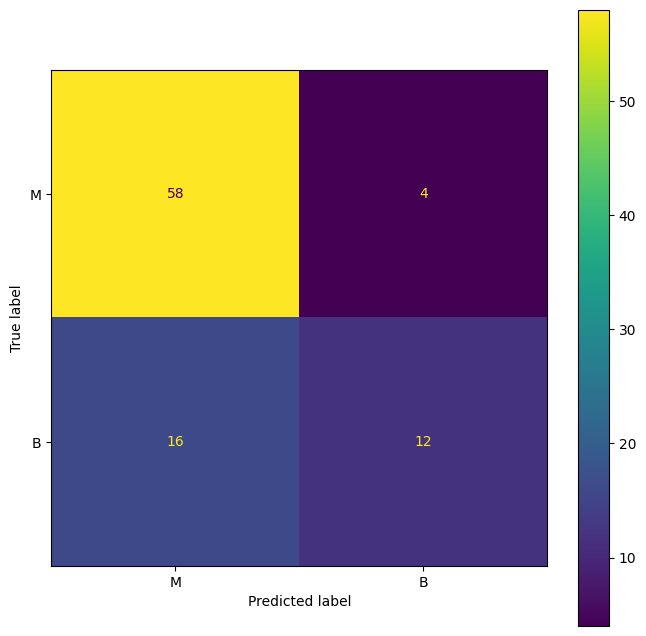

In [15]:
plt.figure(figsize=(8,8))
ConfusionMatrixDisplay.from_estimator(gnb_model, X_test,y_test, display_labels=['M', 'B'], ax=plt.subplot())

Como vemos el modelo tiene un buen TN, FP y FN pero el TP (Verdaderos positivos) no es nada bueno. Aun asi no quiere decir que el modelo sea malo para estos datos. Podemos hacer una curva de ROC para ver el rendimiento del modelo viendo los umbrales de decision

<Figure size 800x800 with 0 Axes>

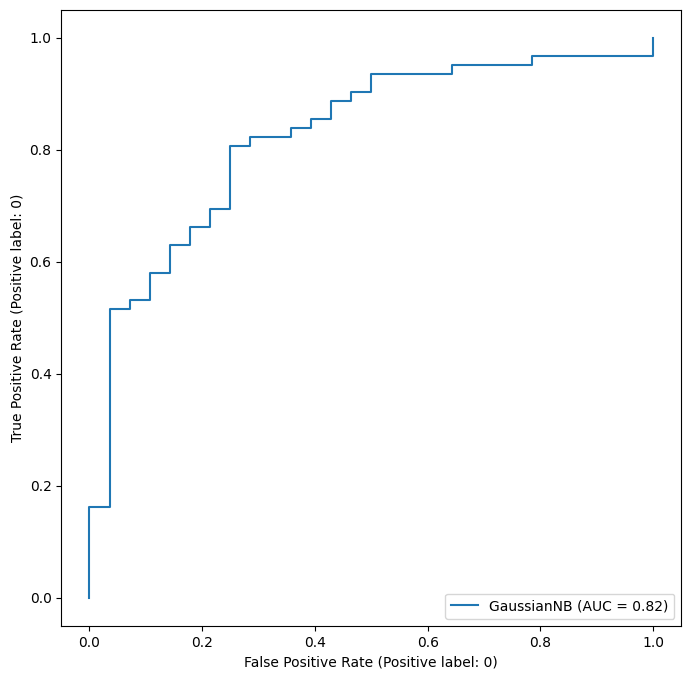

In [16]:
plt.figure(figsize=(8,8))
RocCurveDisplay.from_estimator(gnb_model, X_test,y_test, pos_label=0, ax=plt.subplot())

In [17]:
from sklearn.metrics import roc_auc_score
y_scores = gnb_model.predict_proba(X_test)[:, 1]

# Calcular el AUC-ROC
auc_roc = roc_auc_score(y_test, y_scores)
print(f'AUC-ROC: {auc_roc}')

AUC-ROC: 0.8237327188940092


Con este valor AUC-ROC mas cercano al 1 que al 0.5 vemos que realmente nuestro modelo si esta haciendo buenas predicciones, aunque se podria mejorar ajustando el umbral de decision. Aun asi, como tenemos otro conjunto que probar con datos transformados esto nos podria dar una mejor rendimiento para este mismo modelo.

### Segunda prueba: Conjunto normalizado

In [18]:
dfNorm = df.copy()
cols = ['serum_creatinine','platelets','creatinine_phosphokinase','serum_sodium'] #columns to normalize
for col in cols:
  dfNorm[col] = np.log(df[col])

y2 = dfNorm["DEATH_EVENT"]
X2 = dfNorm.loc[:,df.columns != "DEATH_EVENT"]

X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size = 0.3, random_state=0)

Aplicamos el modelo

In [19]:
gnb = GaussianNB()
print(np.mean(cross_val_score(gnb,X2_train,y2_train, cv=10)))

0.7940476190476191


In [20]:
gnb_model = GaussianNB().fit(X2_train, y2_train)

print('Priors:', gnb_model.class_prior_)
print('Means:\n')
means =pd.DataFrame(gnb_model.theta_)
means.columns=X2.columns
means

Priors: [0.67464115 0.32535885]
Means:



,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,58.283688,0.411348,5.725097,0.425532,40.148936,0.340426,12.424708,0.078872,4.920642,0.659574,0.319149,156.290780
1,65.303926,0.500000,5.612433,0.455882,32.029412,0.397059,12.387763,0.429237,4.904189,0.617647,0.294118,67.044118


In [21]:
print(classification_report(gnb_model.predict(X2_test), y2_test,target_names=['M', 'B']))
results_df = save_results(gnb_model, X2_test, y2_test, 'GNB', results_df)

              precision    recall  f1-score   support

           M       0.95      0.86      0.90        69
           B       0.64      0.86      0.73        21

    accuracy                           0.86        90
   macro avg       0.80      0.86      0.82        90
weighted avg       0.88      0.86      0.86        90



<Figure size 800x800 with 0 Axes>

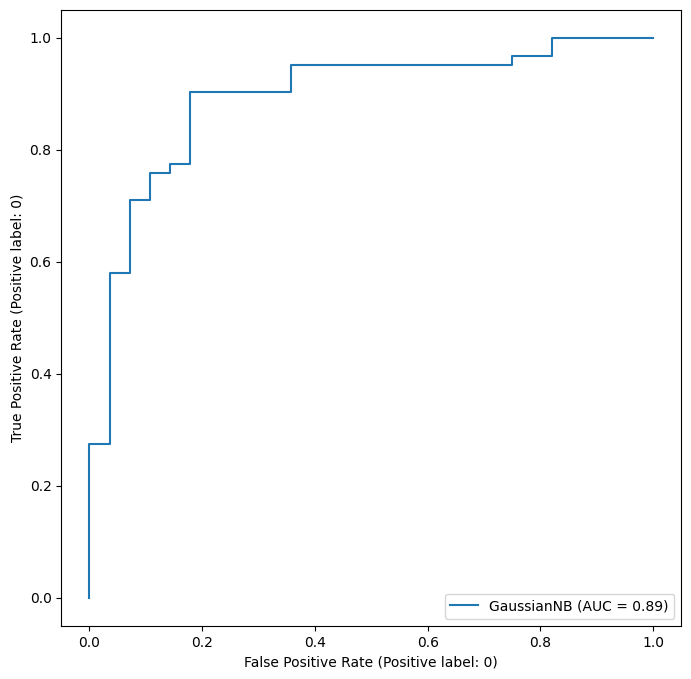

In [22]:
plt.figure(figsize=(8,8))
RocCurveDisplay.from_estimator(gnb_model, X2_test,y2_test, pos_label=0, ax=plt.subplot())

In [23]:
from sklearn.metrics import roc_auc_score
y2_scores = gnb_model.predict_proba(X2_test)[:, 1]

# Calcular el AUC-ROC
auc_roc = roc_auc_score(y2_test, y2_scores)
print(f'AUC-ROC: {auc_roc}')

AUC-ROC: 0.8934331797235022


Como podemos ver, al transformar las variables que se desviaban de la gausianidad conseguimos un mejor rendimiento del modelo

## Modelo discriminante lineal

Como hemos comentado antes, hay cierta correlacón entre variables por lo que los datos se pueden desviar mas de lo asumido por Naive Bayes, aplicaremos un LDA para ver si conseguimos un mejor rendimiento

### LDA con datos no normalizados

In [24]:
lda = LinearDiscriminantAnalysis()
print(np.mean(cross_val_score(lda,X_train,y_train,cv=10)))

0.8421428571428571


Priors: [0.67464115 0.32535885]
Means:



,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,58.283688,0.411348,547.063830,0.425532,40.148936,0.340426,267215.051560,1.183688,137.156028,0.659574,0.319149,156.290780
1,65.303926,0.500000,689.852941,0.455882,32.029412,0.397059,259066.267794,1.794265,134.955882,0.617647,0.294118,67.044118


Intercepts:


,0
0,10.526972


Explained Variance Ratio


,0
0,1.0


Coefs:


<Figure size 2000x200 with 0 Axes>

<Axes: >

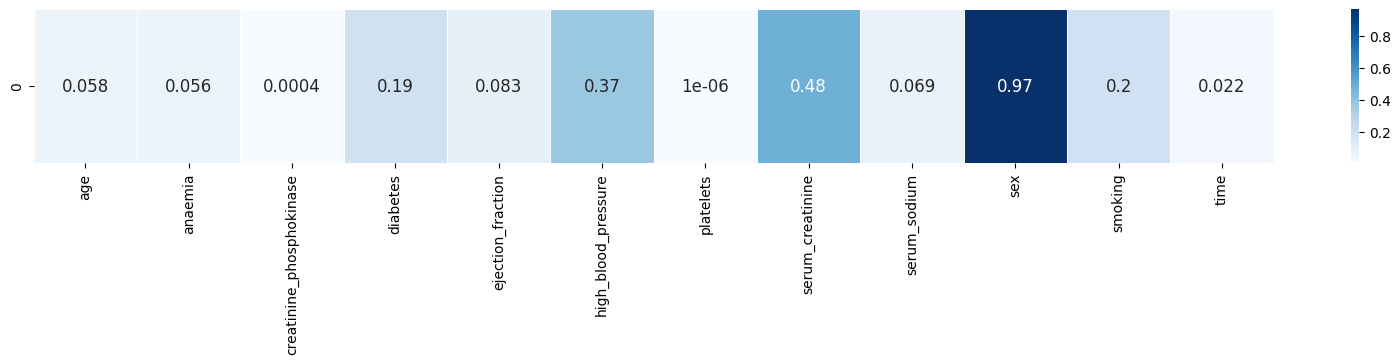

In [25]:
lda_model = LinearDiscriminantAnalysis().fit(X_train, y_train)

print('Priors:', lda_model.priors_)
print('Means:\n')
means =pd.DataFrame(lda_model.means_)
means.columns=X.columns
means

print('Intercepts:')
intercepts = pd.DataFrame(lda_model.intercept_)
intercepts

print('Explained Variance Ratio')
pd.DataFrame(lda_model.explained_variance_ratio_ )

print('Coefs:')
coefs = pd.DataFrame(lda_model.coef_)
coefs.columns = X.columns
# coefs.T

plt.figure(figsize=(20,2))
sns.heatmap(coefs.abs(),annot=True, linewidths=.5,cbar=True,xticklabels=True, cmap='Blues', annot_kws={'size':12})

Como vemos el modelo LDA da mucha mas importancia al género del paciente pero sigue dando importancia a la creatinina. Lo que me parece interesante es que puntua realmente bajo la edad, cosa que el otro modelo (y mi propia lógica) daba mucha mas importancia.

Ahora analizaremos el rendimiento del LDA igual que Naive Bayes

<Figure size 800x800 with 0 Axes>

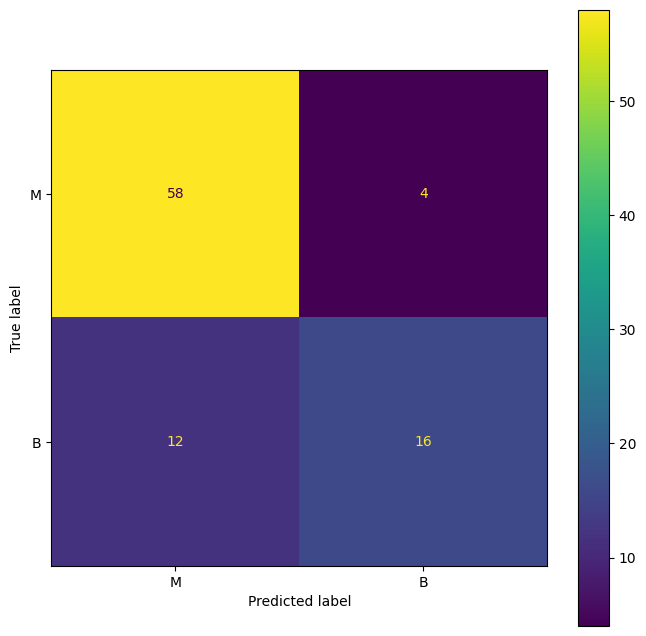

In [26]:
plt.figure(figsize=(8,8))
ConfusionMatrixDisplay.from_estimator(lda_model, X_test,y_test, display_labels=['M', 'B'], ax=plt.subplot())

Como podemos ver en este modelo, a diferencia de Naive Bayes hay mas FN que TP. Analizaremos mejor el rendimiento hacia la curva ROC (y su respectivo calculo auc-roc)

<Figure size 800x800 with 0 Axes>

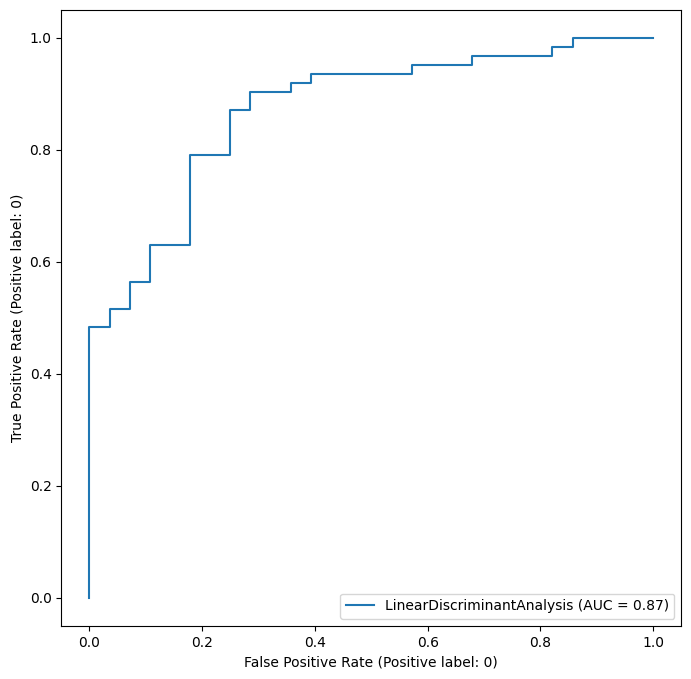

In [27]:
plt.figure(figsize=(8,8))
RocCurveDisplay.from_estimator(lda_model, X_test,y_test, pos_label=0, ax=plt.subplot())

In [28]:
from sklearn.metrics import roc_auc_score
y2_scores = lda_model.predict_proba(X_test)[:, 1]

# Calcular el AUC-ROC
auc_roc = roc_auc_score(y_test, y_scores)
print(f'AUC-ROC: {auc_roc}')

AUC-ROC: 0.8237327188940092


Los valores de rendimiento no mejora respecto a Naive Bayes, provaremos ahora con el otro conjunto de datos

### LDA con datos normalizados

In [29]:
lda = LinearDiscriminantAnalysis()
print(np.mean(cross_val_score(lda,X2_train,y2_train,cv=10)))

0.8421428571428571


Priors: [0.67464115 0.32535885]
Means:



,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,58.283688,0.411348,5.725097,0.425532,40.148936,0.340426,12.424708,0.078872,4.920642,0.659574,0.319149,156.290780
1,65.303926,0.500000,5.612433,0.455882,32.029412,0.397059,12.387763,0.429237,4.904189,0.617647,0.294118,67.044118


Intercepts:


,0
0,42.579354


Explained Variance Ratio


,0
0,1.0


Coefs:


<Figure size 2000x200 with 0 Axes>

<Axes: >

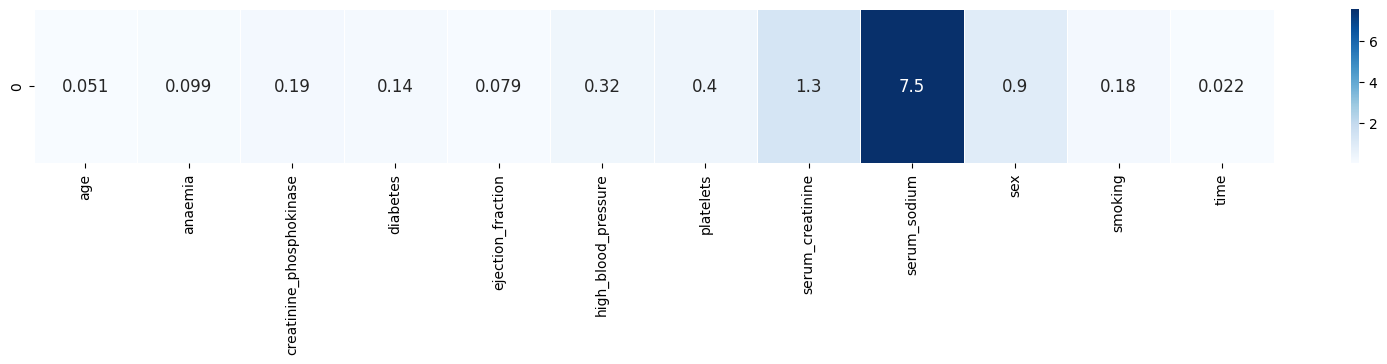

In [30]:
lda_model = LinearDiscriminantAnalysis().fit(X2_train, y2_train)

print('Priors:', lda_model.priors_)
print('Means:\n')
means =pd.DataFrame(lda_model.means_)
means.columns=X2.columns
means

print('Intercepts:')
intercepts = pd.DataFrame(lda_model.intercept_)
intercepts

print('Explained Variance Ratio')
pd.DataFrame(lda_model.explained_variance_ratio_ )

print('Coefs:')
coefs = pd.DataFrame(lda_model.coef_)
coefs.columns = X2.columns
# coefs.T

plt.figure(figsize=(20,2))
sns.heatmap(coefs.abs(),annot=True, linewidths=.5,cbar=True,xticklabels=True, cmap='Blues', annot_kws={'size':12})

Como podemos ver, al cambiar los datos el modelo LDA quita por completo toda la importancia al género y se la ha dado al serum_sodium

Vamos a analizar ahora el rendimiento.

In [31]:
print(classification_report(lda_model.predict(X2_test), y2_test,target_names=['M', 'B']))
results_df = save_results(lda_model, X2_test, y2_test, 'LDA', results_df)

              precision    recall  f1-score   support

           M       0.95      0.86      0.90        69
           B       0.64      0.86      0.73        21

    accuracy                           0.86        90
   macro avg       0.80      0.86      0.82        90
weighted avg       0.88      0.86      0.86        90



<Figure size 800x800 with 0 Axes>

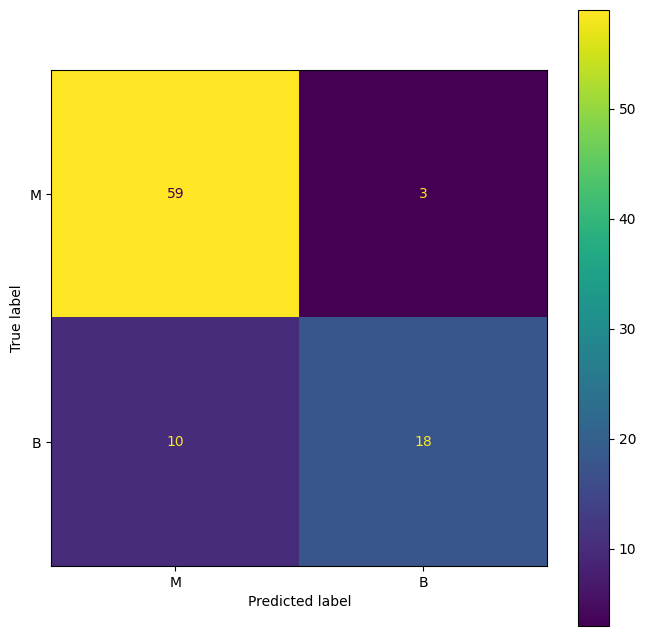

In [32]:
plt.figure(figsize=(8,8))
ConfusionMatrixDisplay.from_estimator(lda_model, X2_test,y2_test, display_labels=['M', 'B'], ax=plt.subplot())

Como vemos aun tiende ligeramente mas a los FN.

<Figure size 800x800 with 0 Axes>

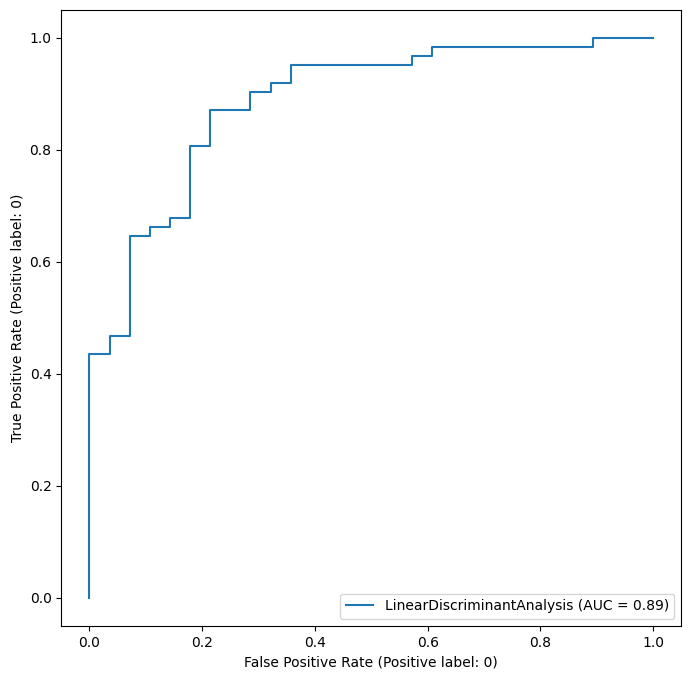

In [33]:
plt.figure(figsize=(8,8))
RocCurveDisplay.from_estimator(lda_model, X2_test,y2_test, pos_label=0, ax=plt.subplot())

In [34]:
from sklearn.metrics import roc_auc_score
y2_scores = lda_model.predict_proba(X2_test)[:, 1]

# Calcular el AUC-ROC
auc_roc = roc_auc_score(y2_test, y2_scores)
print(f'AUC-ROC: {auc_roc}')

AUC-ROC: 0.8859447004608294


Aun que mejora al usar este conjunto de datos normalizados, de momento sigue teniendo mejor rendimiento Naive Bayes

## Modelo de regresión logística

Como dice el enunciado, nuestro dataset mezcla variables discretas y continuas. Por lo que podriamos aplicar un modelo de regresión lógica para intentar obtener mejores resultados.

Para explorar los hiperparametros usaremos el metodo KNN.

### Conjunto no normalizado

Usaremos los mejores hiperparametros para nuestro modelo de regresión logística.

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

param_logistic = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],  
    'solver': ['liblinear', 'lbfgs'],
}

logistic_model = LogisticRegression()

logistic_gs = GridSearchCV(logistic_model, param_logistic, cv=5, n_jobs=-1)
logistic_gs.fit(X_train_s, y_train)

print("Mejores hiperparámetros:", logistic_gs.best_params_)

best_logistic_model = logistic_gs.best_estimator_

accuracy_test_logistic = best_logistic_model.score(X_test_s, y_test)
print(f"Precisión en el conjunto de prueba (Regresión Logística): {accuracy_test_logistic}")


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l2'],
                         'solver': ['liblinear', 'lbfgs']})

Mejores hiperparámetros: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Precisión en el conjunto de prueba (Regresión Logística): 0.8222222222222222


In [36]:
from sklearn.metrics import recall_score

y_pred_logistic = best_logistic_model.predict(X_test_s)

recall_logistic = recall_score(y_test, y_pred_logistic)

print(f"Recall en el conjunto de prueba (Regresión Logística): {recall_logistic}")

Recall en el conjunto de prueba (Regresión Logística): 0.5357142857142857


En el contexto de medicina nos interesa "pecar de previsores" por lo que es preferible disminuir los falsos negativos ante todo, por lo tanto priorizamos un buen recall antes que precision, por lo que un recall del 0,53 no es muy alto y este modelo no se acaba de ajustar a la naturaleza de nuestros datos.

### Datos normalizados

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()
X_train_s = scaler.fit_transform(X2_train)
X_test_s = scaler.transform(X2_test)

param_logistic = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],  
    'solver': ['liblinear', 'lbfgs'],
}

logistic_model = LogisticRegression()

logistic_gs = GridSearchCV(logistic_model, param_logistic, cv=5, n_jobs=-1)
logistic_gs.fit(X_train_s, y_train)

print("Mejores hiperparámetros:", logistic_gs.best_params_)

best_logistic_model = logistic_gs.best_estimator_

accuracy_test_logistic = best_logistic_model.score(X_test_s, y_test)
print(f"Precisión en el conjunto de prueba (Regresión Logística): {accuracy_test_logistic}")


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l2'],
                         'solver': ['liblinear', 'lbfgs']})

Mejores hiperparámetros: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Precisión en el conjunto de prueba (Regresión Logística): 0.8333333333333334


In [38]:
from sklearn.metrics import recall_score

y_pred_logistic = best_logistic_model.predict(X_test_s)

recall_logistic = recall_score(y_test, y_pred_logistic)

print(f"Recall en el conjunto de prueba (Regresión Logística): {recall_logistic}")

Recall en el conjunto de prueba (Regresión Logística): 0.5714285714285714


Como vemos, mejora el recall al normalizar los datos pero no es muy alto igualmente que es lo que nos interesaría.

## Ajuste del balance de los conjuntos de datos

Para ajustar el balance de las clases usamos el parametro de la función de la regresión logiística "class_weight".

### Datos no normalizados balanceados

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

param_logistic = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],  
    'solver': ['liblinear', 'lbfgs'],
}

logistic_model = LogisticRegression(class_weight='balanced')

logistic_gs = GridSearchCV(logistic_model, param_logistic, cv=5, n_jobs=-1)
logistic_gs.fit(X_train_s, y_train)

print("Mejores hiperparámetros:", logistic_gs.best_params_)

best_logistic_model = logistic_gs.best_estimator_

accuracy_test_logistic = best_logistic_model.score(X_test_s, y_test)
print(f"Precisión en el conjunto de prueba (Regresión Logística): {accuracy_test_logistic}")


GridSearchCV(cv=5, estimator=LogisticRegression(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l2'],
                         'solver': ['liblinear', 'lbfgs']})

Mejores hiperparámetros: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Precisión en el conjunto de prueba (Regresión Logística): 0.8333333333333334


In [40]:
from sklearn.metrics import recall_score

y_pred_logistic = best_logistic_model.predict(X_test_s)

recall_logistic = recall_score(y_test, y_pred_logistic)

print(f"Recall en el conjunto de prueba (Regresión Logística): {recall_logistic}")

Recall en el conjunto de prueba (Regresión Logística): 0.7142857142857143


Con los datos no normalizados vemos que el recall mejora bastante y aun asi la precisión se mantiene.

### Datos normalizados balanceados

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()
X_train_s = scaler.fit_transform(X2_train)
X_test_s = scaler.transform(X2_test)

param_logistic = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],  
    'solver': ['liblinear', 'lbfgs'],
}

logistic_model = LogisticRegression(class_weight='balanced')

logistic_gs = GridSearchCV(logistic_model, param_logistic, cv=5, n_jobs=-1)
logistic_gs.fit(X_train_s, y_train)

print("Mejores hiperparámetros:", logistic_gs.best_params_)

best_logistic_model = logistic_gs.best_estimator_

accuracy_test_logistic = best_logistic_model.score(X_test_s, y_test)
print(f"Precisión en el conjunto de prueba (Regresión Logística): {accuracy_test_logistic}")


GridSearchCV(cv=5, estimator=LogisticRegression(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l2'],
                         'solver': ['liblinear', 'lbfgs']})

Mejores hiperparámetros: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Precisión en el conjunto de prueba (Regresión Logística): 0.8444444444444444


In [42]:
from sklearn.metrics import recall_score

y_pred_logistic = best_logistic_model.predict(X_test_s)

recall_logistic = recall_score(y_test, y_pred_logistic)

print(f"Recall en el conjunto de prueba (Regresión Logística): {recall_logistic}")

Recall en el conjunto de prueba (Regresión Logística): 0.7142857142857143


Con los datos normalizados el recall es el mismo pero la precision es ligeramente mayor.

## Conclusiones

Como hemos ido viendo, finalmente el mejor modelo es la regresion logística con el parametro balanced, ya que es la que obtiene mejores valores de precision y sobretodo recall (que como hemos comentado antes en este problema es especialmente relevante).

Creo que el parametro balanced mejora ligeramente los datos por que no hay un equilibro entre clases pero sin duda esto se notaria mas en un problema de clasificacion con multiples clases y no binaria como es el caso.